#**Business Case: Netflix - Data Exploration and Visualization**

##**1. Problem Statement and basic metrics**

**Problem Statement:** As a data scientist, to analyze the Netflix dataset
that consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. To generate insights and provide recommendations that could help
Netflix in deciding which type of shows/movies to produce and how they can
grow the business in different countries.

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**show_id**- unique for each title

**type**- It coulTd be either Movie or TV show

**title**- unique for each data sample

**director**- There could be single or multiple director available for each title Also, some director values are Null.

**Cast**- There could be single or multiple cast available for each title. Also, some cast values are Null (either they are missing or they belong to documentary)

**country**-There could be single or multiple country for each title. Also, some country values are missing.

**date_added**- There could be some missing values

**rating**- There could be some missing values

**Duration**- It could be either in minutes(for movies) or seasons(for tv
shows). Some missing values are there.

In [ ]:
(df.isnull().sum()/len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

## **2. Observations on the shape of data, data types of all the attributes,** **conversion of categorical attributes to 'category' (If required), missing** **value detection, statistical summary**

In [ ]:
df.shape

(8807, 12)

- shape=(8807,12)

- Total 8807 rows and 12 columns are there in original dataset

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


- release_year datatype is int64, and all other columns datatype is
object.

- To perform datetime functions on data_added, its datatype needs to
be converted to datetime.

**Statistical summary:**

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- Total movie/Tv shows available on netflix dataset = 8807

- Average of Movie/TV show released year =2014.18

- Oldest movie/TV show released year=1925

- Latest movie/Tv show released year=2021

- 25% of movie/tv show available released on or before 2013.

- 50% of movie/tv show available released on or before 2016.

- 75% of movie/tv show released on or before 2019.

- As 25% of content released year lies between 1925 to 2013(88 years), rest
75% of content released year lies between 2013 to 2021 (8 years). This clearly
indicates that more newer movie/tv shows are available on Netflix as compared
to older movie/tv shows.

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


- Type unique value =2 refers to 2 type of content available i.e. Movies and TV
shows

- rating unique value=17 refers that there are 17 different kind of ratings which are provided to content on Netflix

- As we have multiple values seperated by comma in columns- director, cast, country, listed_in. Thus, for analysis of individual performance, these
columns must be converted in such a manner that each columns should
have a single values for each respective title. Thus, it could be achieved
using various pandas methods like, melt, explode, stacking.

In [ ]:
df['cast']=df['cast'].str.split(',')


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df=df.explode('cast').reset_index().drop('index',axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
df['director']=df['director'].str.split(',')
df['country']=df['country'].str.split(',')
df['listed_in']=df['listed_in'].str.split(',')
df=df.explode('director').reset_index().drop('index',axis=1)
df=df.explode('country').reset_index().drop('index',axis=1)
df=df.explode('listed_in').reset_index().drop('index',axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       190168 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- dataset after pre-processing (Unnesting) the data now contains 202065 rows. Columns- director, cast, country, listed_in now contains single values against the title column.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


**Dealing with missing values:**

**Approach**- Each column missing values is to be replace with mode (highest frequency) value of that column value based on some grouping.
Firstly, country columns missing values is to filled.
So for that purpose, country column missing value is filled with mode value of country column which is grouped by listed_in columns.

In [ ]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [ ]:
df['country']=df.groupby('listed_in')['country'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna(x))
df.head()

<ipython-input-19-14028610aef5>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['country']=df.groupby('listed_in')['country'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna(x))


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- Now, it is also observed that some values in country column is empty, and thus it is also filled with mode value of listed_in column which is grouped.

In [ ]:
df['country'].unique()

array(['United States', 'South Africa', 'Japan', 'United Kingdom',
       'India', ' Ghana', ' Burkina Faso', ' United Kingdom', ' Germany',
       ' Ethiopia', 'Germany', ' Czech Republic', 'Mexico', 'South Korea',
       'Turkey', 'Australia', ' India', ' France', 'Finland', 'China',
       ' Canada', ' United States', ' Japan', 'Nigeria', 'Spain',
       'France', 'Belgium', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Lebanon', 'R

In [ ]:
df[df['country']==""]['title'].unique()

array(['D.P.', 'Eyes of a Thief', 'The Present', 'Funan', 'City of Joy',
       'Virunga', 'Hotel Pacific'], dtype=object)

In [ ]:
grouped_modes = df.groupby('listed_in')['country'].apply(lambda x: x.mode().iloc[0])
df['country'] = df.apply(lambda row: grouped_modes[row['listed_in']] if row['country'] == '' else row['country'], axis=1)


In [ ]:
df[df['country']==""]['title'].unique()

array([], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      151422 non-null  object        
 4   cast          199916 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- Now, director's missing values to be filled using mode values combining both listed_in and country column together as group.

In [ ]:
df['director']=df.groupby(['listed_in','country'])['director'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna(x))
df.head()

<ipython-input-26-9f24c1ffe203>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['director']=df.groupby(['listed_in','country'])['director'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna(x))


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      189564 non-null  object        
 4   cast          199916 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- As it is visible that some director missing values are filled, while some are remaining.
- This is because some mode values are empty when listed_in and country column are combined together in a group.
- Thus for remaining missing values, it will be filled with mode value of director column itself.

In [ ]:
df['director']=df['director'].transform(lambda x:x.fillna(x.mode().iloc[0]))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Danny Cannon,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          199916 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- Similarly, cast missing values are filled using mode values combining both listed_in and country column together as group.

In [ ]:
df['cast']=df.groupby(['listed_in','country'])['cast'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna(x))
df.head()

<ipython-input-30-6e1db501feb5>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['cast']=df.groupby(['listed_in','country'])['cast'].apply(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna(x))


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Danny Cannon,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          201858 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- remaining cast column missing values, will be filled with mode value of cast column itself.

In [ ]:
df['cast']=df['cast'].transform(lambda x:x.fillna(x.mode().iloc[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- Date_added column missing values are filled using mode value of date_added column itself.

In [ ]:
df['date_added']=df['date_added'].transform(lambda x:x.fillna(x.mode().iloc[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    202065 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201998 non-null  object        
 9   duration      202062 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- rating column missing values are filled using mode value of rating column itself.

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

- As, it is clearly visible that there are some false values present in rating column for e.g. '74 min', '84 min', '66 min'.

In [ ]:
df.loc[df['rating'].isin(['74 min','84 min','66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- It is visible that, these values are supposed to be present in duration column instead of rating column.

In [ ]:
df.loc[df['rating'].isin(['74 min','84 min','66 min']),'duration']=df.loc[df['rating'].isin(['74 min','84 min','66 min']),'rating']
df.loc[df['rating'].isin(['74 min','84 min','66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[df['rating'].isin(['74 min','84 min','66 min']),'rating']=None
df.iloc[[126582,131648,131782]]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
126582,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,None,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
131648,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,None,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
131782,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,None,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    202065 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        201995 non-null  object        
 9   duration      202065 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [ ]:
df['rating']=df['rating'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    202065 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        202065 non-null  object        
 9   duration      202065 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


- duration column will be split further in duration and its units, in order to analyze the aggregation on duration.

In [ ]:
df[['duration','duration_units']]=df['duration'].apply(lambda x: pd.Series(str(x).split(' ')))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons
2,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Seasons
3,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Seasons
4,s2,TV Show,Blood & Water,Danny Cannon,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons


In [ ]:
df['duration']=df['duration'].astype('str').astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   show_id         202065 non-null  object        
 1   type            202065 non-null  object        
 2   title           202065 non-null  object        
 3   director        202065 non-null  object        
 4   cast            202065 non-null  object        
 5   country         202065 non-null  object        
 6   date_added      202065 non-null  datetime64[ns]
 7   release_year    202065 non-null  int64         
 8   rating          202065 non-null  object        
 9   duration        202065 non-null  int64         
 10  listed_in       202065 non-null  object        
 11  description     202065 non-null  object        
 12  duration_units  202065 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 20.0+ MB


- It is also observed that country and listed_in column have trailing whitespaces, and it should be removed before the analysis of dataset. As it can generate multiple unique values.

- Before removing trailing whitespace:

In [ ]:
df['country'].unique()

array(['United States', 'South Africa', 'Japan', 'United Kingdom',
       'India', ' Ghana', ' Burkina Faso', ' United Kingdom', ' Germany',
       ' Ethiopia', 'Germany', ' Czech Republic', 'Mexico', 'South Korea',
       'Turkey', 'Australia', ' India', ' France', 'Finland', 'China',
       ' Canada', ' United States', ' Japan', 'Nigeria', 'Spain',
       'France', 'Belgium', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', ' South Korea',
       'Ireland', ' Nepal', 'New Zealand', ' Brazil', ' Greece', 'Jordan',
       'Colombia', 'Switzerland', 'Israel', 'Brazil', ' Spain', 'Taiwan',
       ' Nigeria', 'Bulgaria', ' Algeria', 'Poland', ' Israel',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', ' Denmark',
       ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium', 'Malaysia',
       ' New Zealand', 'Vietnam', ' Hungary', 'Sweden', 'Lebanon',
       'Roman

In [ ]:
len(df['country'].unique())

196

In [ ]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [ ]:
len(df['listed_in'].unique())

73

- After removing trailing whitespaces:

In [ ]:
df['country']=df['country'].apply(lambda x: x.strip())
df['country'].unique()[:50]

array(['United States', 'South Africa', 'Japan', 'United Kingdom',
       'India', 'Ghana', 'Burkina Faso', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'South Korea', 'Turkey', 'Australia',
       'France', 'Finland', 'China', 'Canada', 'Nigeria', 'Spain',
       'Belgium', 'Singapore', 'Italy', 'Romania', 'Argentina',
       'Venezuela', 'Hong Kong', 'Russia', 'Ireland', 'Nepal',
       'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam'], dtype=object)

In [ ]:
len(df['country'].unique())

122

In [ ]:
df['listed_in']=df['listed_in'].apply(lambda x: x.strip())
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
len(df['listed_in'].unique())

42

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
show_id,202065,8807,s7165,700
type,202065,2,Movie,145917
title,202065,8807,Kahlil Gibran's The Prophet,700
director,202065,5120,Danny Cannon,16237
cast,202065,39296,Samuel West,578
country,202065,122,United States,66653
rating,202065,14,TV-MA,73985
listed_in,202065,42,Dramas,29806
description,202065,8775,A troubled young girl and her mother find sola...,700
duration_units,202065,3,min,145917


##**3. Non-Graphical Analysis: Value counts and unique attributes :**




In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons
2,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Seasons
3,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Seasons
4,s2,TV Show,Blood & Water,Danny Cannon,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons


**Comparison of tv shows vs movies:**

- Approax 2/3 of content is available in form of movies and other 1/3 content
is available in form of Tv shows on Netflix.

In [ ]:
df['show_id'].nunique()

8807

In [ ]:
df.groupby('type')['show_id'].nunique()/df['show_id'].nunique()*100

type
Movie      69.615079
TV Show    30.384921
Name: show_id, dtype: float64

<Axes: ylabel='show_id'>

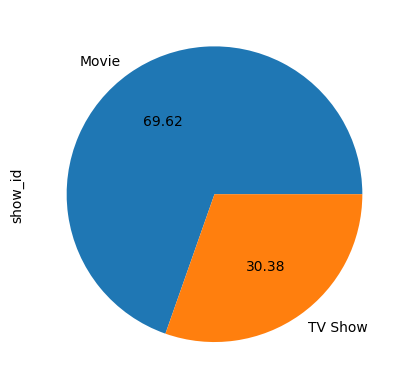

In [ ]:
df.groupby('type')['show_id'].nunique().plot(kind='pie',autopct="%.2f")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons
2,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Seasons
3,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Seasons
4,s2,TV Show,Blood & Water,Danny Cannon,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons


- Type of content available in different countries:

In [ ]:
df.groupby('country')['listed_in'].unique()

country
Afghanistan                 [Documentaries, International Movies]
Albania                            [Dramas, International Movies]
Algeria         [Dramas, Independent Movies, International Mov...
Angola                 [Action & Adventure, International Movies]
Argentina       [Dramas, International Movies, Thrillers, Crim...
                                      ...                        
Vatican City    [Documentaries, Faith & Spirituality, Internat...
Venezuela       [Dramas, International Movies, Thrillers, Docu...
Vietnam         [Dramas, International Movies, Romantic Movies...
West Germany    [International TV Shows, TV Comedies, Document...
Zimbabwe        [Comedies, International Movies, Romantic Movi...
Name: listed_in, Length: 122, dtype: object

**Country wise order for different type of content available:**
- United State> Canada=United Kingdom>Australia>France

In [ ]:
df.groupby('country')['listed_in'].nunique().sort_values()

country
Somalia            1
Botswana           1
Bermuda            1
Bahamas            1
Ecuador            1
                  ..
France            35
Australia         36
Canada            37
United Kingdom    37
United States     42
Name: listed_in, Length: 122, dtype: int64

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons
2,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Seasons
3,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Seasons
4,s2,TV Show,Blood & Water,Danny Cannon,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons


- **Analysis based on movies and tv show:**

In [ ]:
movies=df[df['type']=='Movie']
movies.sort_values(by=['release_year','duration']).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
187540,s8206,Movie,The Battle of Midway,John Ford,Henry Fonda,United States,2017-03-31,1942,TV-14,18,Classic Movies,Director John Ford captures combat footage of ...,min
187541,s8206,Movie,The Battle of Midway,John Ford,Henry Fonda,United States,2017-03-31,1942,TV-14,18,Documentaries,Director John Ford captures combat footage of ...,min
187542,s8206,Movie,The Battle of Midway,John Ford,Jane Darwell,United States,2017-03-31,1942,TV-14,18,Classic Movies,Director John Ford captures combat footage of ...,min
187543,s8206,Movie,The Battle of Midway,John Ford,Jane Darwell,United States,2017-03-31,1942,TV-14,18,Documentaries,Director John Ford captures combat footage of ...,min
177451,s7791,Movie,Prelude to War,Frank Capra,Burgess Meredith,United States,2017-03-31,1942,TV-14,52,Classic Movies,Frank Capra's documentary chronicles the rise ...,min


In [ ]:
tv=df[df['type']=='TV Show']
tv.sort_values(by=['release_year','duration']).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
99245,s4251,TV Show,Pioneers: First Women Filmmakers*,Arvind Swamy,Aditi Balan,India,2018-12-30,1925,TV-14,1,TV Shows,This collection restores films from women who ...,Season
32601,s1332,TV Show,Five Came Back: The Reference Films,Bruce Sinofsky,Kirk Hammett,United States,2021-02-09,1945,TV-MA,1,TV Shows,This collection includes 12 World War II-era p...,Season
176479,s7744,TV Show,Pioneers of African-American Cinema,Oscar Micheaux,Kirk Hammett,United States,2017-02-01,1946,TV-14,1,TV Shows,This newly preserved collection features more ...,Season
176480,s7744,TV Show,Pioneers of African-American Cinema,Spencer Williams,Kirk Hammett,United States,2017-02-01,1946,TV-14,1,TV Shows,This newly preserved collection features more ...,Season
176481,s7744,TV Show,Pioneers of African-American Cinema,Richard E. Norman,Kirk Hammett,United States,2017-02-01,1946,TV-14,1,TV Shows,This newly preserved collection features more ...,Season


- Shortest movie duration-3 min
- oldest movie release year-1942

In [ ]:
movies.min()


show_id                                                          s1
type                                                          Movie
title                                                        #Alive
director                                             Aaron Moorhead
cast                                                            Jr.
country                                                 Afghanistan
date_added                                      2008-01-01 00:00:00
release_year                                                   1942
rating                                                            G
duration                                                          3
listed_in                                        Action & Adventure
description       "Bridgerton" cast members share behind-the-sce...
duration_units                                                  min
dtype: object

- Shortest tv show duration-1 season
- oldest tv show release year-1925

In [ ]:
tv.min()

show_id                                                        s100
type                                                        TV Show
title                                                      #blackAF
director                                           Abhishek Chaubey
cast                                                            Jr.
country                                                   Argentina
date_added                                      2008-02-04 00:00:00
release_year                                                   1925
rating                                                           NR
duration                                                          1
listed_in                                              Anime Series
description       "Everybody Loves Raymond" creator Phil Rosenth...
duration_units                                               Season
dtype: object

- Oldest release movie year-2021
- longest duration movie-312 minutes

In [ ]:
movies.max()

show_id                                                        s999
type                                                          Movie
title                                           최강전사 미니특공대 : 영웅의 탄생
director                                               Şenol Sönmez
cast                                                   Ṣọpẹ́ Dìrísù
country                                                    Zimbabwe
date_added                                      2021-09-25 00:00:00
release_year                                                   2021
rating                                                           UR
duration                                                        312
listed_in                                                 Thrillers
description       Zixin is about to marry Qihong, but her galliv...
duration_units                                                  min
dtype: object

- Oldest release tv show year-2021
- longest duration movie-17 season

In [ ]:
tv.max()

show_id                                                        s998
type                                                        TV Show
title                                                          마녀사냥
director                                               Ziad Doueiri
cast                                                 Şükrü Özyıldız
country                                                West Germany
date_added                                      2021-09-24 00:00:00
release_year                                                   2021
rating                                                     TV-Y7-FV
duration                                                         17
listed_in                                             Teen TV Shows
description       “Last Chance U” hits the hardwood in East Los ...
duration_units                                              Seasons
dtype: object

- No of Movies release year(oldest)

In [ ]:
movies.groupby('release_year')['title'].nunique().head(10)

release_year
1942    2
1943    3
1944    3
1945    3
1946    1
1947    1
1954    2
1955    3
1956    2
1958    3
Name: title, dtype: int64

- No of TV shows release year(oldest)

In [ ]:
tv.groupby('release_year')['title'].nunique().head(10)

release_year
1925    1
1945    1
1946    1
1963    1
1967    1
1972    1
1974    1
1977    1
1979    1
1981    1
Name: title, dtype: int64

- No of movies released (latest years)
- Number increases up to year 2018 (767 movies) and declined thereafter.

In [ ]:
movies.groupby('release_year')['title'].nunique().tail(20)

release_year
2002     44
2003     51
2004     55
2005     67
2006     82
2007     74
2008    113
2009    118
2010    154
2011    145
2012    173
2013    225
2014    264
2015    398
2016    658
2017    767
2018    767
2019    633
2020    517
2021    277
Name: title, dtype: int64

- No of tv shows released (latest years)
- Increasing trend observed in no. of tv shows released with year

In [ ]:
tv.groupby('release_year')['title'].nunique().tail(20)

release_year
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    380
2019    397
2020    436
2021    315
Name: title, dtype: int64

In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min


**Movies produced country (High to low)**
- United States > India > United Kingdom > Canada

In [ ]:
movies.groupby('country')['title'].nunique().sort_values()

country
Afghanistan              1
Kazakhstan               1
Palestine                1
Nicaragua                1
Dominican Republic       1
                      ... 
France                 303
Canada                 319
United Kingdom         534
India                 1176
United States         3195
Name: title, Length: 117, dtype: int64

**TV Shows produced country (High to low)**
- United States > South Korea > United Kingdom > Japan > Canada

In [ ]:
tv.groupby('country')['title'].nunique().sort_values()

country
Mauritius                  1
United Arab Emirates       1
Austria                    1
Azerbaijan                 1
Belarus                    1
                        ... 
Canada                   126
Japan                    274
United Kingdom           335
South Korea              349
United States           1264
Name: title, Length: 65, dtype: int64

**In United States,**
- total movies produced=3195 (maximum among all)
- total movie director=2594
- total movie cast=14526
- total movie genre=20
- total movie rating=14

In [ ]:
movies[movies['country']=='United States'].describe(include='object').T

,count,unique,top,freq
show_id,50376,3195,s7516,468
type,50376,1,Movie,50376
title,50376,3195,Movie 43,468
director,50376,2594,Noah Baumbach,290
cast,50376,14526,Samuel West,323
country,50376,1,United States,50376
rating,50376,14,R,13637
listed_in,50376,20,Comedies,9171
description,50376,3186,An eye-popping cast stars in this sketch-comed...,468
duration_units,50376,1,min,50376


**In United States,**
- total tv show produced=1264 (maximum among all)
- total tv director=131
- total tv cast=7101
- total tv genre=22
- total tv rating=7

In [ ]:
tv[tv['country']=='United States'].describe(include='object').T

,count,unique,top,freq
show_id,16277,1264,s5306,126
type,16277,1,TV Show,16277
title,16277,1264,Narcos,126
director,16277,131,Danny Cannon,5325
cast,16277,7101,Lena Waithe,106
country,16277,1,United States,16277
rating,16277,7,TV-MA,7804
listed_in,16277,22,TV Dramas,3433
description,16277,1262,The true story of Colombia's infamously violen...,126
duration_units,16277,2,Season,8168


In [ ]:
movies_us=movies[movies['country']=='United States']
movies_us.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min


In [ ]:
tv_us=tv[tv['country']=='United States']
tv_us.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
58,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021-09-24,2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...,Season
60,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021-09-24,2021,TV-MA,1,TV Action & Adventure,To protect his family from a powerful drug lor...,Season
61,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,United States,2021-09-24,2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...,Season
63,s3,TV Show,Ganglands,Julien Leclercq,Tracy Gotoas,United States,2021-09-24,2021,TV-MA,1,TV Action & Adventure,To protect his family from a powerful drug lor...,Season
64,s3,TV Show,Ganglands,Julien Leclercq,Samuel Jouy,United States,2021-09-24,2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...,Season


- Movies produced in United states increases till 2017 (397 movies) and decreases afterward

In [ ]:
movies_us.groupby('release_year')['title'].nunique().tail(20)

release_year
2002     27
2003     33
2004     25
2005     36
2006     42
2007     41
2008     61
2009     70
2010     83
2011     77
2012     93
2013    109
2014    129
2015    191
2016    302
2017    397
2018    372
2019    335
2020    256
2021    174
Name: title, dtype: int64

- TV Shows produced in United States starts from 2002 and increasing trend observed.
- Currently, no of tv shows produced by US has outnumbered the number of movies produced by US

In [ ]:
tv_us.groupby('release_year')['title'].nunique().tail(20)

release_year
2002      3
2003      6
2004      3
2005      8
2006      7
2007      7
2008     10
2009     11
2010     17
2011     14
2012     22
2013     21
2014     30
2015     58
2016    106
2017    106
2018    189
2019    202
2020    218
2021    187
Name: title, dtype: int64

**Director with most number of movies produced-**
- Rajiv Chilaka > Peter Spirer > David Dhawan

In [ ]:
movies.groupby('director')['title'].nunique().sort_values()

director
Joel Oliansky       1
K.S. Ravikumar      1
KVR Mahendra        1
Kaashvie Nair       1
Kabir Bhatia        1
                   ..
 Asit Mohapatra    21
Ryan Polito        22
David Dhawan       27
Peter Spirer       41
Rajiv Chilaka      49
Name: title, Length: 4887, dtype: int64

**Director with most number of TV shows produced- **
- Danny Cannon > Abhishek Chaubey > Kenny Ortega

In [ ]:
tv.groupby('director')['title'].nunique().sort_values()

director
Hayato Date             1
Glen Winter             1
Glenn Weiss             1
Gordon Anderson         1
Greg Tiernan            1
                     ... 
Shin Won-ho           214
Noam Murro            230
Kenny Ortega          246
 Abhishek Chaubey     264
Danny Cannon         1047
Name: title, Length: 300, dtype: int64

In [ ]:
movies[movies['director']=='Rajiv Chilaka'].groupby('listed_in')['title'].nunique().sort_values()

listed_in
Sports Movies                2
Children & Family Movies    49
Name: title, dtype: int64

In [ ]:
tv[tv['director']=='Danny Cannon'].groupby('listed_in')['title'].nunique().sort_values()

listed_in
Korean TV Shows                   5
Classic & Cult TV                 6
Stand-Up Comedy & Talk Shows     10
Spanish-Language TV Shows        15
Anime Series                     21
British TV Shows                 25
TV Horror                        25
TV Thrillers                     27
TV Sci-Fi & Fantasy              31
TV Mysteries                     39
Science & Nature TV              39
Teen TV Shows                    50
Reality TV                       52
Docuseries                       57
Romantic TV Shows                93
Kids' TV                        101
TV Action & Adventure           101
TV Comedies                     115
Crime TV Shows                  233
International TV Shows          256
TV Dramas                       374
Name: title, dtype: int64

In [ ]:
movies[movies['director']=='Peter Spirer'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
4198,s171,Movie,Rhyme & Reason,Peter Spirer,Too $hort,United States,2021-09-01,1997,R,89,Documentaries,The world and culture of rap song topics such ...,min
4199,s171,Movie,Rhyme & Reason,Peter Spirer,Too $hort,United States,2021-09-01,1997,R,89,Music & Musicals,The world and culture of rap song topics such ...,min
4200,s171,Movie,Rhyme & Reason,Peter Spirer,B-Real,United States,2021-09-01,1997,R,89,Documentaries,The world and culture of rap song topics such ...,min
4201,s171,Movie,Rhyme & Reason,Peter Spirer,B-Real,United States,2021-09-01,1997,R,89,Music & Musicals,The world and culture of rap song topics such ...,min
4202,s171,Movie,Rhyme & Reason,Peter Spirer,Kurtis Blow,United States,2021-09-01,1997,R,89,Documentaries,The world and culture of rap song topics such ...,min


**In United states, genre of movies produced :**
- Dramas > Comedies > Documentaries

In [ ]:
movies[movies['country']=='United States'].groupby('listed_in')['title'].nunique().sort_values()

listed_in
Anime Features                7
Faith & Spirituality         44
Movies                       45
Cult Movies                  53
LGBTQ Movies                 68
Classic Movies               83
Sports Movies               131
International Movies        166
Sci-Fi & Fantasy            182
Music & Musicals            194
Horror Movies               218
Stand-Up Comedy             248
Romantic Movies             253
Thrillers                   320
Independent Movies          402
Action & Adventure          446
Children & Family Movies    496
Documentaries               588
Comedies                    774
Dramas                      949
Name: title, dtype: int64

**In United States, genre of TV Shows produced:**
- TV Comedies > TV Dramas > Kids TV

In [ ]:
tv[tv['country']=='United States'].groupby('listed_in')['title'].nunique().sort_values()

listed_in
Korean TV Shows                   3
TV Shows                          4
Anime Series                     18
Classic & Cult TV                18
British TV Shows                 24
Spanish-Language TV Shows        29
TV Thrillers                     31
Stand-Up Comedy & Talk Shows     36
Teen TV Shows                    36
TV Horror                        40
Romantic TV Shows                44
TV Mysteries                     57
Science & Nature TV              59
TV Sci-Fi & Fantasy              65
International TV Shows           74
TV Action & Adventure           109
Reality TV                      144
Crime TV Shows                  186
Docuseries                      238
Kids' TV                        284
TV Dramas                       333
TV Comedies                     338
Name: title, dtype: int64

**Genre of movies available on Netflix:**
- International Movies > Dramas > Comedies

In [ ]:
movies.groupby('listed_in')['title'].nunique().sort_values()

listed_in
Movies                        57
Faith & Spirituality          65
Anime Features                71
Cult Movies                   71
LGBTQ Movies                 102
Classic Movies               116
Sports Movies                219
Sci-Fi & Fantasy             243
Stand-Up Comedy              343
Horror Movies                357
Music & Musicals             375
Thrillers                    577
Romantic Movies              616
Children & Family Movies     641
Independent Movies           756
Action & Adventure           859
Documentaries                869
Comedies                    1674
Dramas                      2427
International Movies        2752
Name: title, dtype: int64

**Genre of TV show available on Netflix:**
- International TV shows > TV Dramas > TV comedies

In [ ]:
tv.groupby('listed_in')['title'].nunique().sort_values()

listed_in
TV Shows                          16
Classic & Cult TV                 28
Stand-Up Comedy & Talk Shows      56
TV Thrillers                      57
Teen TV Shows                     69
TV Horror                         75
TV Sci-Fi & Fantasy               84
Science & Nature TV               92
TV Mysteries                      98
Korean TV Shows                  151
TV Action & Adventure            168
Spanish-Language TV Shows        174
Anime Series                     176
British TV Shows                 253
Reality TV                       255
Romantic TV Shows                370
Docuseries                       395
Kids' TV                         451
Crime TV Shows                   470
TV Comedies                      581
TV Dramas                        763
International TV Shows          1351
Name: title, dtype: int64

**International movies producing countries:**
- India > France > United Kingdom

In [ ]:
movies[movies['listed_in']=='International Movies'].groupby('country')['title'].nunique().sort_values()

country
Afghanistan          1
Greece               1
Jamaica              1
Latvia               1
Mongolia             1
                  ... 
Spain              140
United States      166
United Kingdom     170
France             207
India             1078
Name: title, Length: 100, dtype: int64

**International TV shows producing countries:**
- South Korea > Japan > United Kingdom

In [ ]:
tv[tv['listed_in']=='International TV Shows'].groupby('country')['title'].nunique().sort_values()

country
Luxembourg                1
United Arab Emirates      1
Syria                     1
Switzerland               1
Senegal                   1
                       ... 
Taiwan                   70
United States            74
United Kingdom          128
Japan                   215
South Korea             311
Name: title, Length: 61, dtype: int64

**Most number of movies by cast:**
- Samuel West > Anupam Kher > Rupa Bhimani

In [ ]:
movies.groupby('cast')['title'].nunique().sort_values()

cast
  Jr.                1
 Paul Kwo            1
 Paul Kaye           1
 Paul Kasey          1
 Paul Jurewicz       1
                  ... 
 Benjamin Kyalo     37
 Burt Young         38
 Rupa Bhimani       54
 Anupam Kher        80
Samuel West        328
Name: title, Length: 27879, dtype: int64

**Most number of TV Shows by cast:**
- David Attenborough > Lena Waithe > Deborah Ann Woll

In [ ]:
tv.groupby('cast')['title'].nunique().sort_values()

cast
  Jr.                   1
 Peter Eastway          1
 Peter Ferdinando       1
 Peter Gadiot           1
 Peter Gantzler         1
                     ... 
Samuel West            41
 Takahiro Sakurai      44
 Deborah Ann Woll      50
 Lena Waithe           93
David Attenborough    130
Name: title, Length: 15502, dtype: int64

**Genre of movies, in Samuel West worked as Cast:**
- Documentaries > International Movies > Sports movies

In [ ]:
movies[movies['cast']=='Samuel West'].groupby('listed_in')['title'].nunique().sort_values()

listed_in
Anime Features                1
Horror Movies                 1
Music & Musicals              1
Action & Adventure            2
Faith & Spirituality          2
LGBTQ Movies                  2
Children & Family Movies      5
Sports Movies                 8
International Movies         25
Documentaries               313
Name: title, dtype: int64

**Genre of TV shows in which David Attenborough worked as Cast:**
- Docuseries > British TV shows > Science & Nature TV

In [ ]:
tv[tv['cast']=='David Attenborough'].groupby('listed_in')['title'].nunique().sort_values()

listed_in
International TV Shows     5
Science & Nature TV       39
British TV Shows          56
Docuseries                90
Name: title, dtype: int64

- Addition of movies in Netflix started from 2008, and increasing trend observed till 2019.
- Most number of movies added year=2019 (1424 movies)

In [ ]:
movies['year_added']=pd.to_datetime(movies['date_added']).dt.year
movies.groupby('year_added')['title'].nunique()

<ipython-input-93-72171758de77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year_added']=pd.to_datetime(movies['date_added']).dt.year


year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
Name: title, dtype: int64

- Addition of TV shows in Netflix started from 2008, and increasing trend observed afterwards
- Most number of tv show added year=2020 (605 tv shows)

In [ ]:
tv['year_added']=pd.to_datetime(tv['date_added']).dt.year
tv.groupby('year_added')['title'].nunique()

<ipython-input-94-5d47584e0161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['year_added']=pd.to_datetime(tv['date_added']).dt.year


year_added
2008      1
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    605
2021    505
Name: title, dtype: int64

**Movies added in Netflix month wise:**
- July > April > Dec

In [ ]:
movies['month_added']=pd.to_datetime(movies['date_added']).dt.month
movies.groupby('month_added')['title'].nunique()

<ipython-input-95-085343105fb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['month_added']=pd.to_datetime(movies['date_added']).dt.month


month_added
1     546
2     382
3     529
4     550
5     439
6     492
7     565
8     519
9     519
10    545
11    498
12    547
Name: title, dtype: int64

**TV shows added in Netflix month-wise:**
- Dec > July > Sep

In [ ]:
tv['month_added']=pd.to_datetime(tv['date_added']).dt.month
tv.groupby('month_added')['title'].nunique()

<ipython-input-96-e734fb92d0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['month_added']=pd.to_datetime(tv['date_added']).dt.month


month_added
1     202
2     181
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    266
Name: title, dtype: int64

**Movies rating order:**
- TV-MA > TV-14 > R

In [ ]:
movies.groupby('rating')['title'].nunique().sort_values()

rating
NC-17          3
UR             3
TV-Y7-FV       5
G             41
NR            75
TV-G         126
TV-Y         131
TV-Y7        139
PG           287
PG-13        490
TV-PG        540
R            797
TV-14       1427
TV-MA       2067
Name: title, dtype: int64

**TV Shows rating order:**
- TV-MA > TV-14 > TV-PG

In [ ]:
tv.groupby('rating')['title'].nunique().sort_values()

rating
TV-Y7-FV       1
R              2
NR             5
TV-G          94
TV-Y         176
TV-Y7        195
TV-PG        323
TV-14        733
TV-MA       1147
Name: title, dtype: int64

##**4. Visual Analysis - Univariate, Bivariate**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**4.1 For continuous variable(s): Distplot, countplot, histogram for
univariate analysis :**

In [ ]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons
2,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Seasons
3,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Seasons
4,s2,TV Show,Blood & Water,Danny Cannon,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons


1. Increasing trend observed for movies release year till 2019 and decreases
afterwards.
2.Increasing trend observed for TV shows release with year

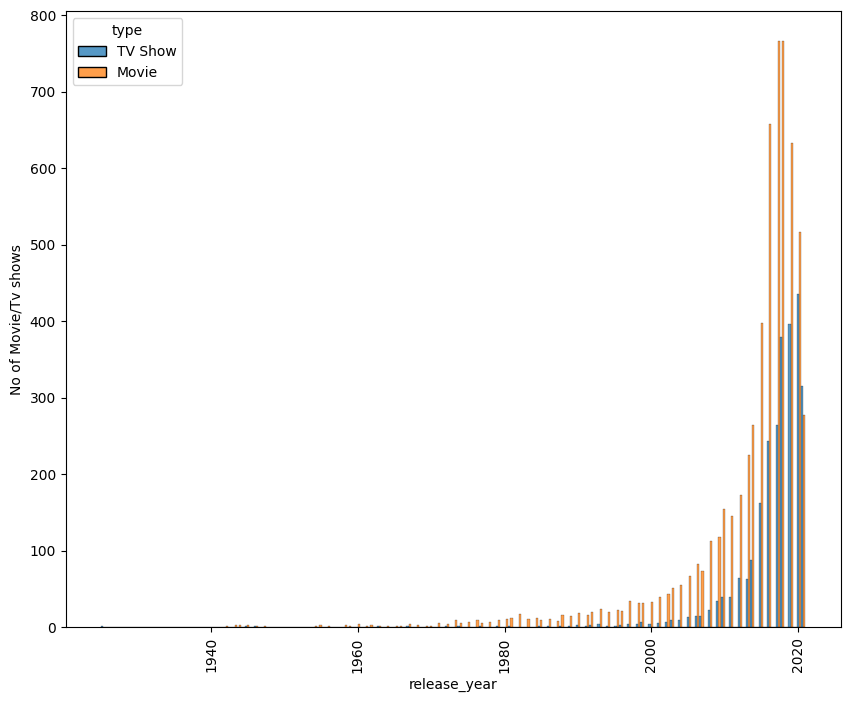

In [ ]:
plt.figure(figsize=(10,8))
release_year=df.groupby(['release_year','type','title']).nunique().reset_index()
sns.histplot(data=release_year,x='release_year',hue='type',multiple="dodge")
# plt.locator_params(nbins=10)
plt.xticks(rotation=90)
plt.ylabel('No of Movie/Tv shows')
plt.show()

**1.For movies:**
- 25% of movies release year: 2013
- 50% of movies release year: 2016
- 75% of movies release year: 2018

Movies below and above 1.5 times of Inter Quartile range will be considered
as outliers.

Inter Quartile range=75% of movies release year- 25% of movies release
year

So outliers will be below 2004 (approax)

**2. For TV Show:**
- 25% of tv shows release year: 2016
- 50% of tv shows release year: 2018
- 75% of tv shows release year: 2020

TV shows below and above 1.5 times of Inter Quartile range will be
considered as outliers.

Inter Quartile range=75% of tv shows release year- 25% of tv shows release
year

So outliers will be below 2010 (approax)

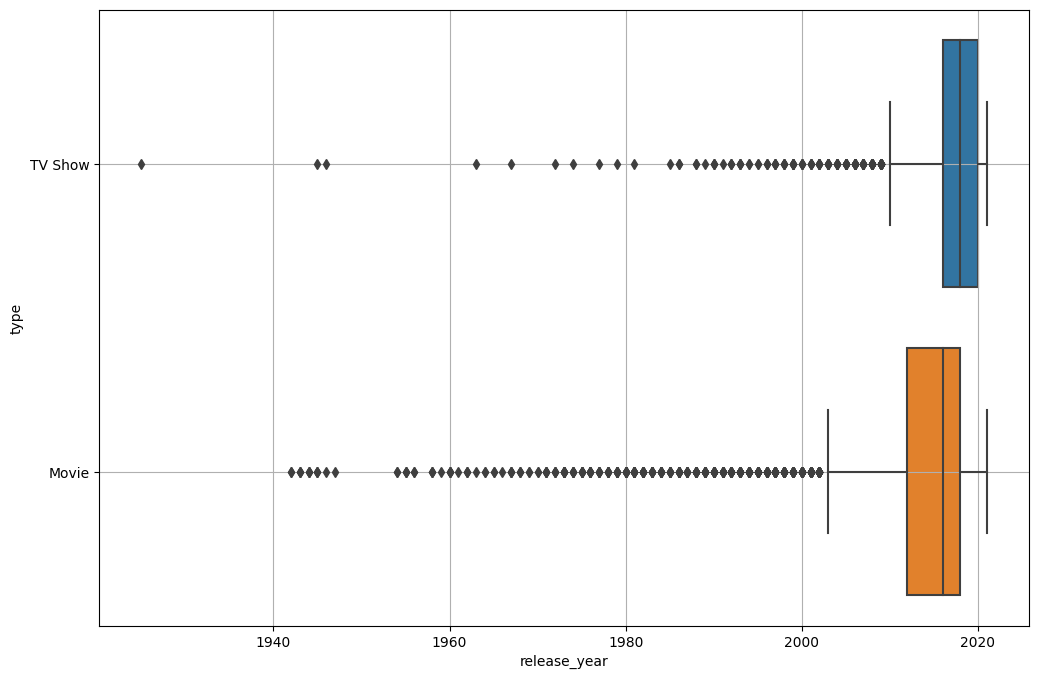

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=release_year,x='release_year',y='type')
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

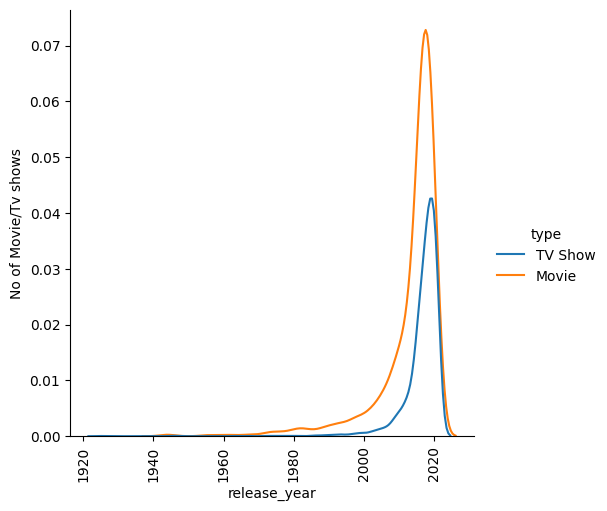

In [ ]:
plt.figure(figsize=(10,8))
release_year=df.groupby(['release_year','type','title']).nunique().reset_index()
sns.displot(data=release_year,x='release_year',hue='type',kind='kde')
# plt.locator_params(nbins=10)
plt.xticks(rotation=90)
plt.ylabel('No of Movie/Tv shows')
plt.show()

- Rating for maximum movies-TV-MA
- Rating for maximum TV shows-TV-MA

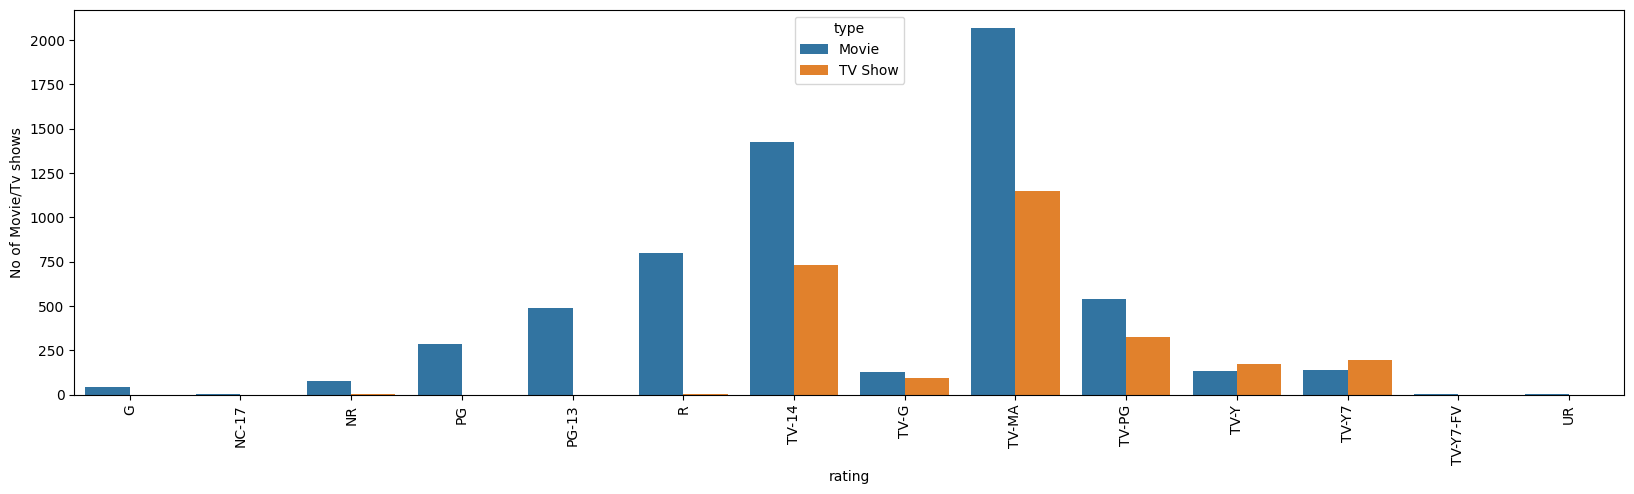

In [ ]:
plt.figure(figsize=(20,5))
rating=df.groupby(['rating','type'])['title'].nunique().reset_index()
sns.barplot(data=rating,x='rating',y='title',hue='type')
plt.xticks(rotation=90)
plt.ylabel('No of Movie/Tv shows')
plt.show()

**Trend for movies genre wise:**

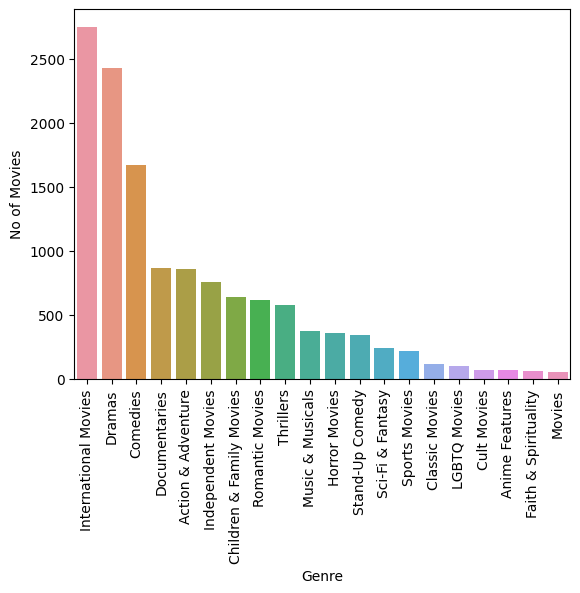

In [ ]:
genre=movies.groupby(['listed_in','title']).nunique().reset_index()
sns.countplot(data=genre,x='listed_in',order=genre['listed_in'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('No of Movies')
plt.show()

**Trend for TV show genre wise:**

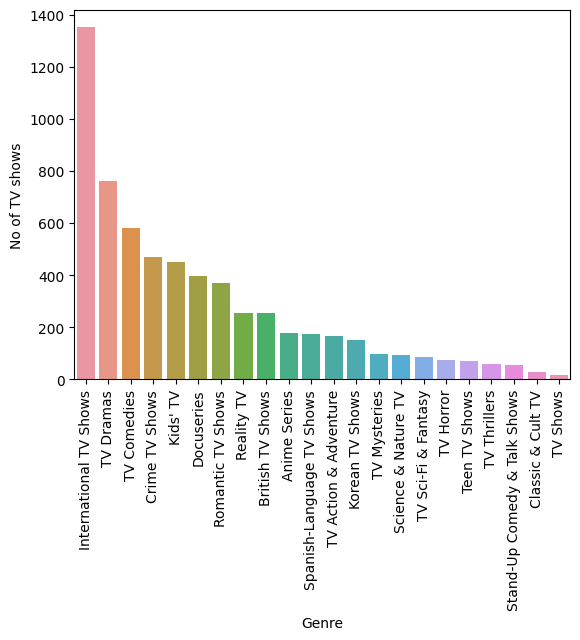

In [ ]:
genre_tv=tv.groupby(['listed_in','title']).nunique().reset_index()
sns.countplot(data=genre_tv,x='listed_in',order=genre_tv['listed_in'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('No of TV shows')
plt.show()

**Top 25 movies producing country:**

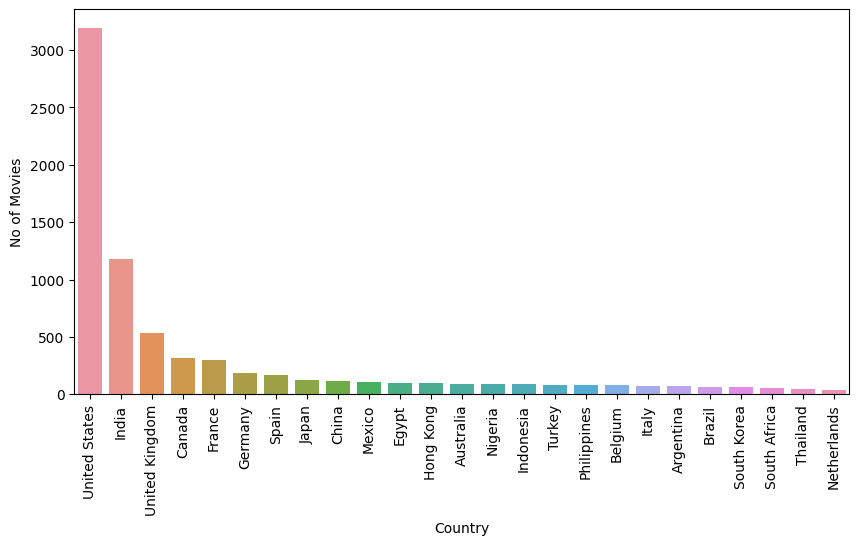

In [ ]:
plt.figure(figsize=(10,5))
mov_country=movies.groupby(['country','title']).nunique().reset_index()
top25=mov_country['country'].value_counts().reset_index().iloc[0:25]
mov_country_top25=mov_country[mov_country['country'].isin(top25['index'])]
sns.countplot(data=mov_country_top25,x='country',order=mov_country_top25['country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('No of Movies')
plt.show()

**Bottom 25 movie producing country:**

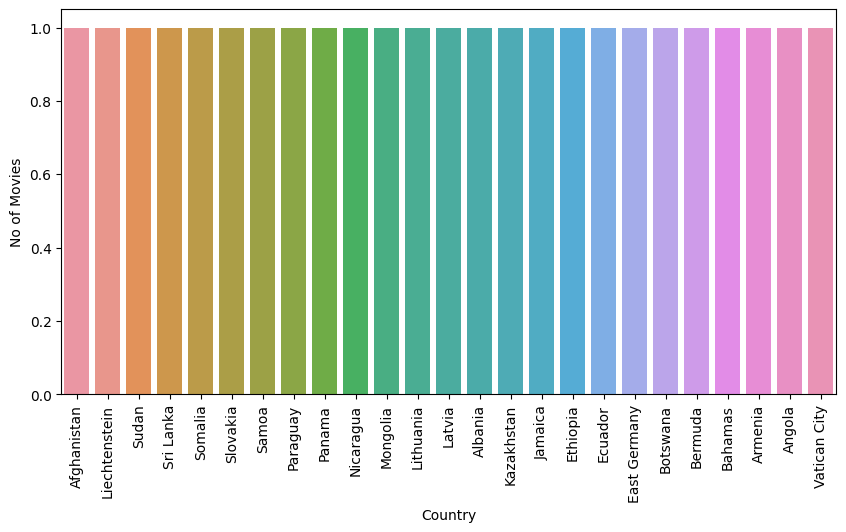

In [ ]:
plt.figure(figsize=(10,5))
mov_country=movies.groupby(['country','title']).nunique().reset_index()
bot25=mov_country['country'].value_counts().reset_index().iloc[-25:]
mov_country_bot25=mov_country[mov_country['country'].isin(bot25['index'])]
sns.countplot(data=mov_country_bot25,x='country',order=mov_country_bot25['country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('No of Movies')
plt.show()

**Top 25 tv shows producing country:**

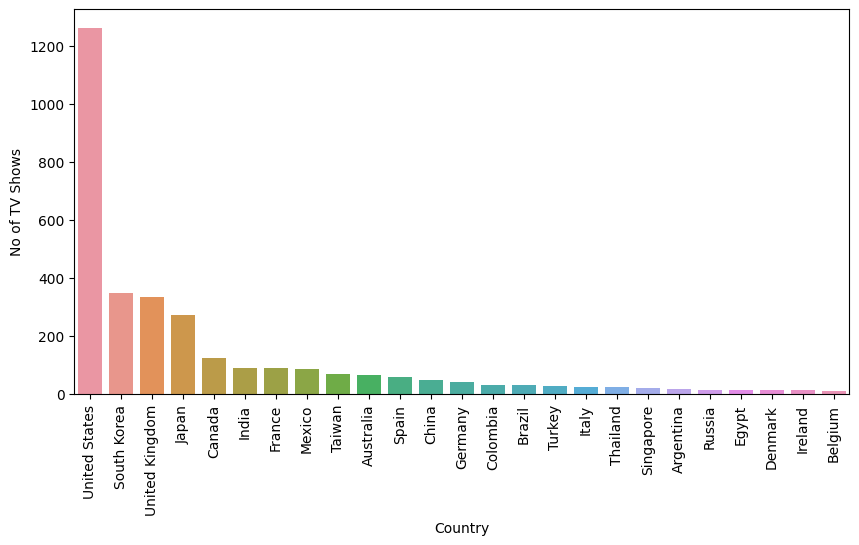

In [ ]:
plt.figure(figsize=(10,5))
tv_country=tv.groupby(['country','title']).nunique().reset_index()
top25=tv_country['country'].value_counts().reset_index().iloc[0:25]
tv_country_top25=tv_country[tv_country['country'].isin(top25['index'])]
sns.countplot(data=tv_country_top25,x='country',order=tv_country_top25['country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('No of TV Shows')
plt.show()

**Bottom 25 tv shows producing country:**

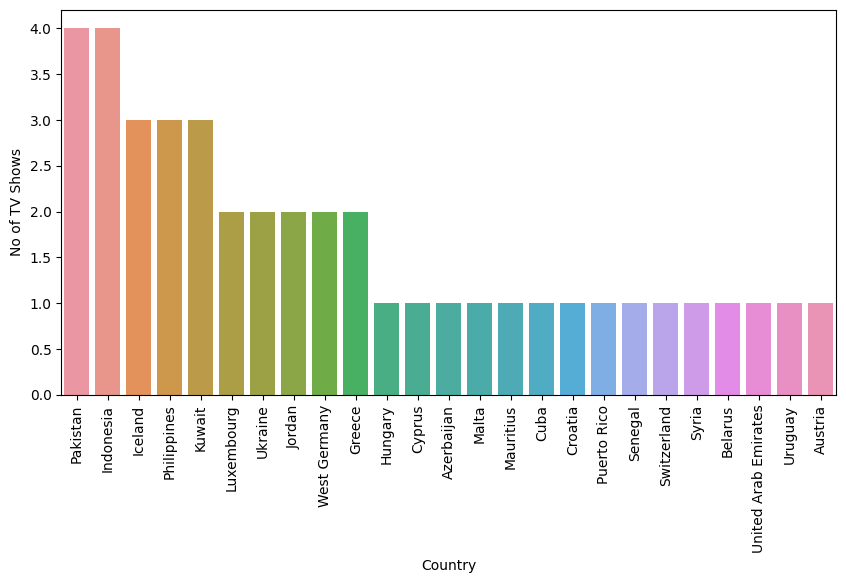

In [ ]:
plt.figure(figsize=(10,5))
tv_country=tv.groupby(['country','title']).nunique().reset_index()
bot25=tv_country['country'].value_counts().reset_index().iloc[-25:]
tv_country_bot25=tv_country[tv_country['country'].isin(bot25['index'])]
sns.countplot(data=tv_country_bot25,x='country',order=tv_country_bot25['country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('No of TV Shows')
plt.show()

In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min,2021,9
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9


**Top 25 movie producing director:**

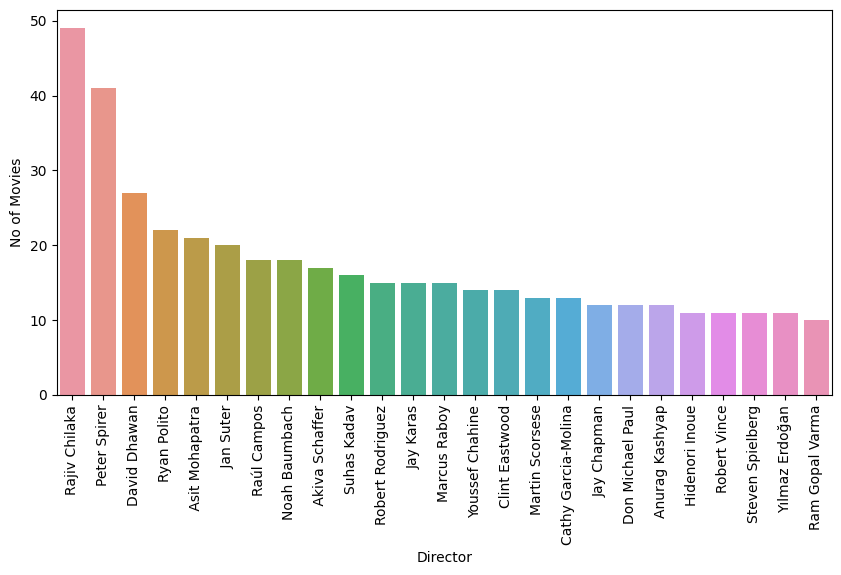

In [ ]:
plt.figure(figsize=(10,5))
mov_dir=movies.groupby(['director','title']).nunique().reset_index()
top25=mov_dir['director'].value_counts().reset_index().iloc[0:25]
mov_dir_top25=mov_dir[mov_dir['director'].isin(top25['index'])]
sns.countplot(data=mov_dir_top25,x='director',order=mov_dir_top25['director'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('No of Movies')
plt.show()

**Top 25 tv shows producing director:**

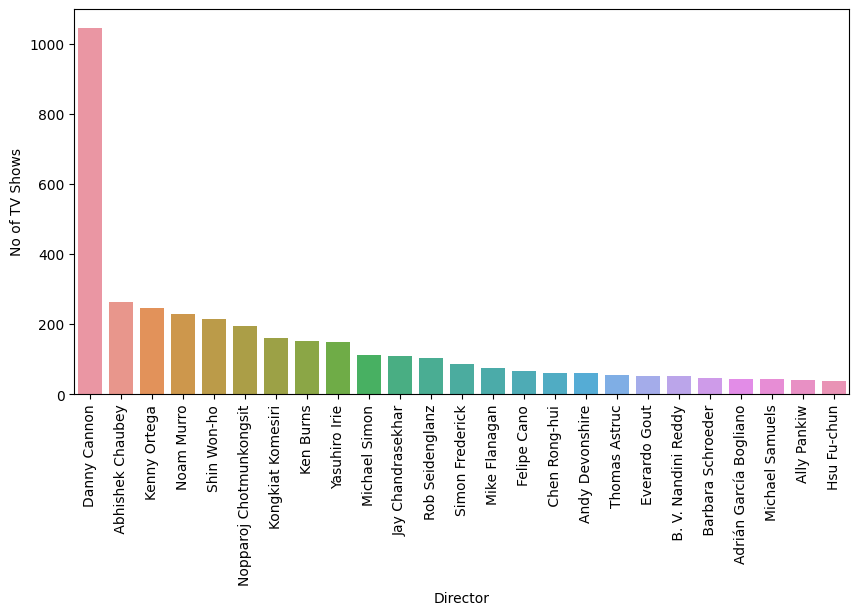

In [ ]:
plt.figure(figsize=(10,5))
tv_dir=tv.groupby(['director','title']).nunique().reset_index()
top25=tv_dir['director'].value_counts().reset_index().iloc[0:25]
tv_dir_top25=tv_dir[tv_dir['director'].isin(top25['index'])]
sns.countplot(data=tv_dir_top25,x='director',order=tv_dir_top25['director'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('No of TV Shows')
plt.show()

**Top 25 movie cast:**

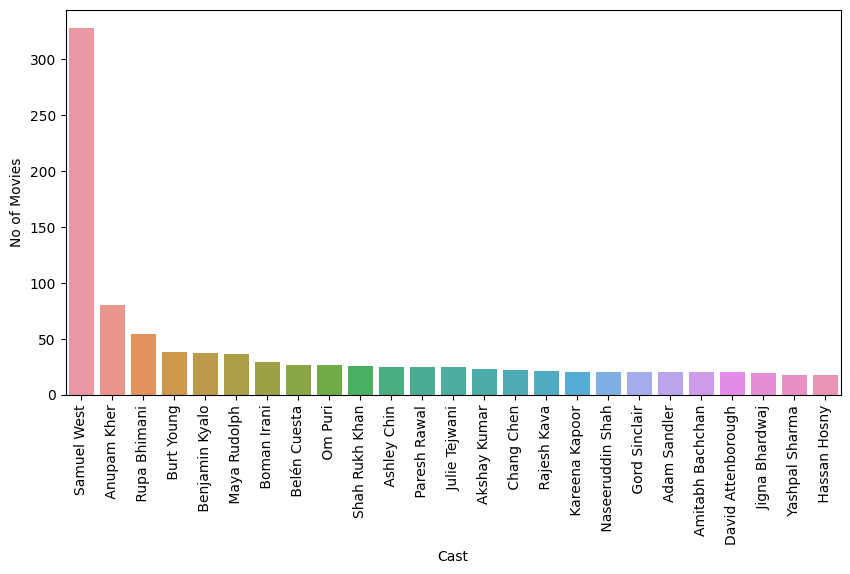

In [ ]:
plt.figure(figsize=(10,5))
mov_cast=movies.groupby(['cast','title']).nunique().reset_index()
top25=mov_cast['cast'].value_counts().reset_index().iloc[0:25]
mov_cast_top25=mov_cast[mov_cast['cast'].isin(top25['index'])]
sns.countplot(data=mov_cast_top25,x='cast',order=mov_cast_top25['cast'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Cast')
plt.ylabel('No of Movies')
plt.show()

**Top 25 tv shows cast:**

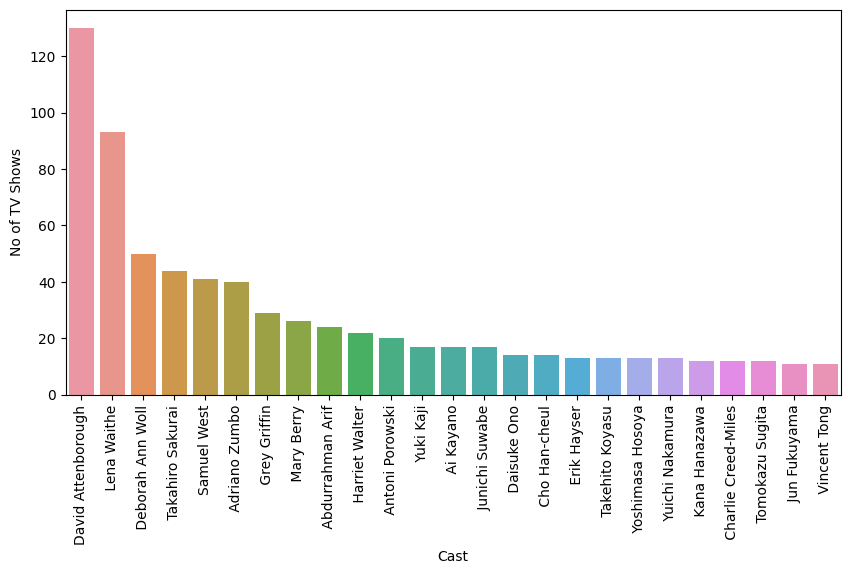

In [ ]:
plt.figure(figsize=(10,5))
tv_cast=tv.groupby(['cast','title']).nunique().reset_index()
top25=tv_cast['cast'].value_counts().reset_index().iloc[0:25]
tv_cast_top25=tv_cast[tv_cast['cast'].isin(top25['index'])]
sns.countplot(data=tv_cast_top25,x='cast',order=tv_cast_top25['cast'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Cast')
plt.ylabel('No of TV Shows')
plt.show()

In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min,2021,9
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9


**Movies added month-wise trend:**

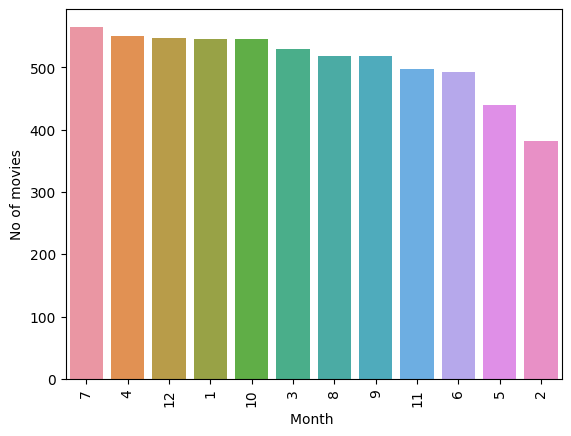

In [ ]:
movies_month=movies.groupby(['month_added','title']).nunique().reset_index()
sns.countplot(data=movies_month,x='month_added',order=movies_month['month_added'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Month ')
plt.ylabel('No of movies')
plt.show()

**TV show added month-wise trend:**

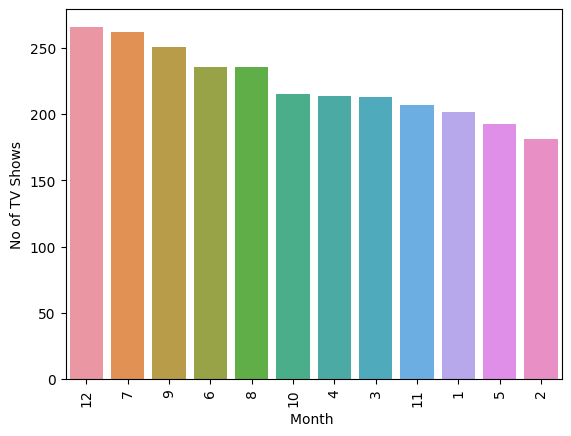

In [ ]:
tv_month=tv.groupby(['month_added','title']).nunique().reset_index()
sns.countplot(data=tv_month,x='month_added',order=tv_month['month_added'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Month ')
plt.ylabel('No of TV Shows')
plt.show()

In [ ]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min,2021,9
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,min,2021,9


**Movies duration(min.) trend**

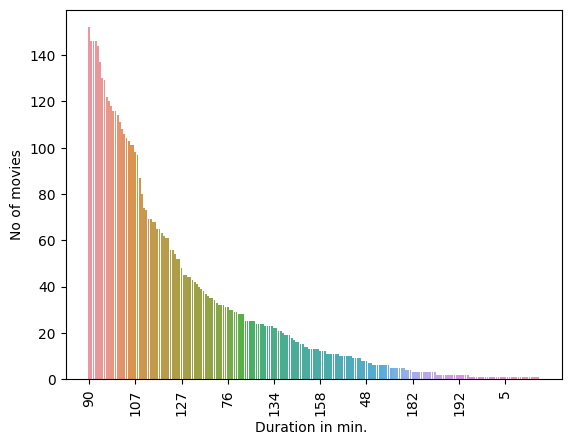

In [ ]:
movies_dur=movies.groupby(['duration','title']).nunique().reset_index()
sns.countplot(data=movies_dur,x='duration',order=movies_dur['duration'].value_counts().index)
plt.locator_params(nbins=10)
plt.xticks(rotation=90)
plt.xlabel('Duration in min. ')
plt.ylabel('No of movies')
plt.show()

**Movies duration:**
- 25% of movies duration time: 85 min
- 50% of movies duration time: 98 min
- 75% of movies duration time: 115 min

Movies duration below and above 1.5 times of Inter Quartile range will be considered as outliers.

Inter Quartile range=75% of movies duration- 25% of movies duration

So outliers will be below 45 min and above 155 min (approax)

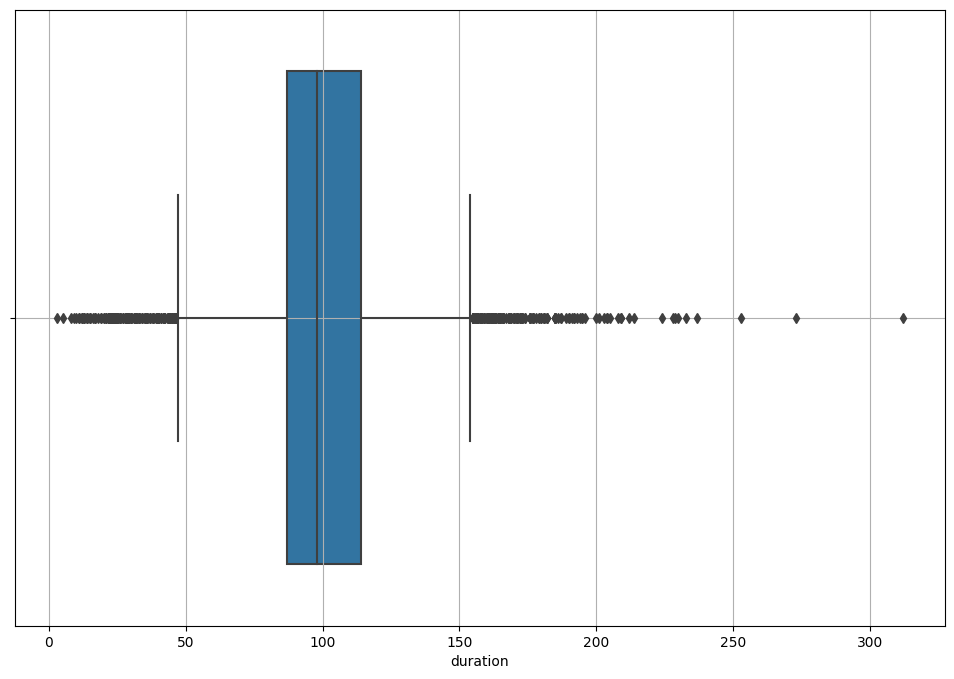

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=movies_dur,x='duration')
plt.grid()
plt.show()

**tv shows duration(Season) trend:**

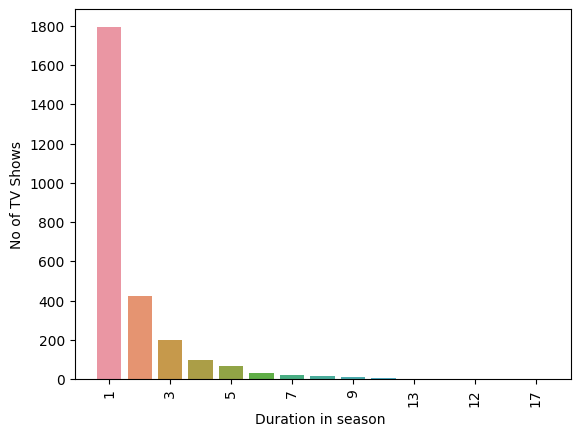

In [ ]:
tv_dur=tv.groupby(['duration','title']).nunique().reset_index()
sns.countplot(data=tv_dur,x='duration',order=tv_dur['duration'].value_counts().index)
plt.locator_params(nbins=10)
plt.xticks(rotation=90)
plt.xlabel('Duration in season ')
plt.ylabel('No of TV Shows')
plt.show()

**TV shows duration:**
- 25% of tv shows duration time: 1 season
- 75% of tv shows duration time: 2 season

TV shows duration below and above 1.5 times of Inter Quartile range will be considered as outliers.

Inter Quartile range=75% of TV shows duration- 25% of TV shows duration

So outliers will be below 1 season and above 3 season (approax)

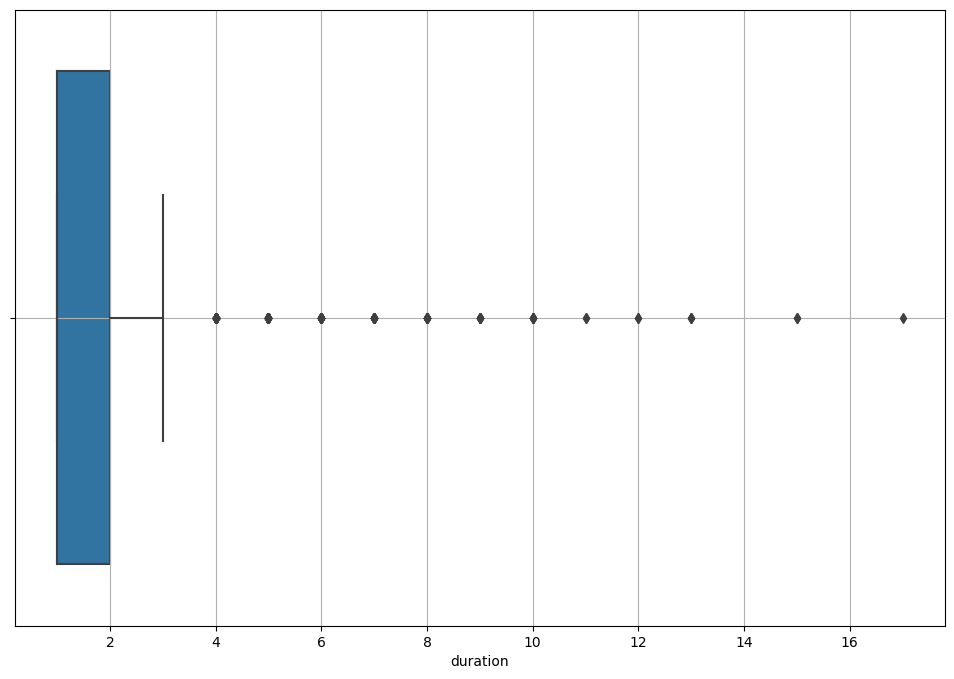

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=tv_dur,x='duration')
plt.grid()
plt.show()

**4.3 For correlation: Heatmaps, Pairplots:**
- Content release year and duration of content are weekly negative co-related

<ipython-input-125-01c46d896f3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues", annot=True)


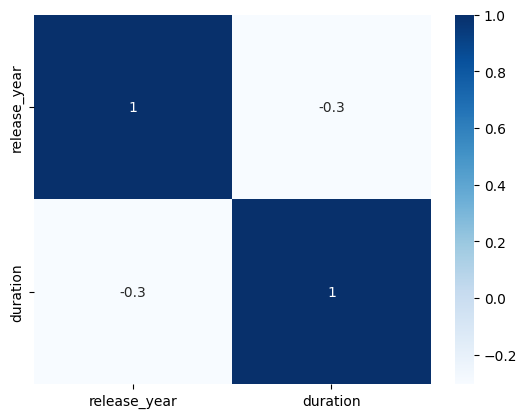

In [ ]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

- Negatively week co-related


<ipython-input-126-5ae7ec88fdcb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies.corr(), cmap="Blues", annot=True)


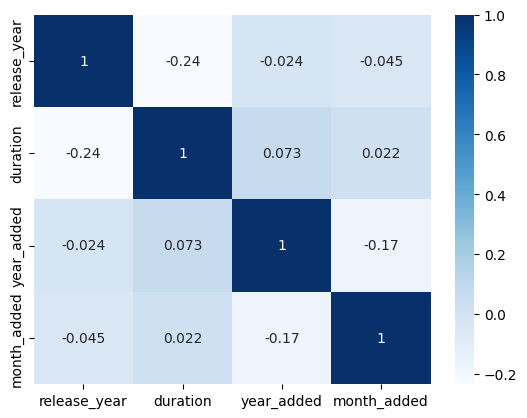

In [ ]:
sns.heatmap(movies.corr(), cmap="Blues", annot=True)
plt.show()

- Medium positive co-relation between release year of tv shows and Added year of tv shows.
- It shows that tv shows production has started increasing in recent years, with the advent of OTT platforms.
- Thus they are increasingly added as years passed by.

<ipython-input-127-f8d06e157753>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tv.corr(), cmap="Blues", annot=True)


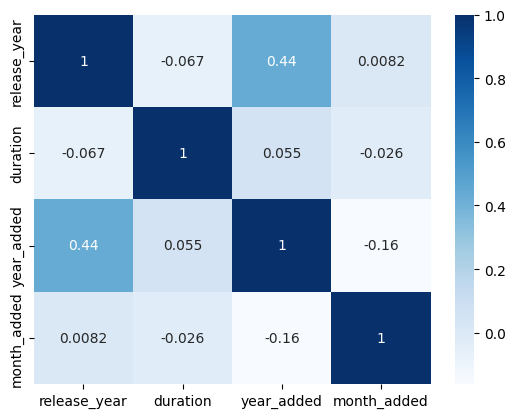

In [ ]:
sns.heatmap(tv.corr(), cmap="Blues", annot=True)
plt.show()

- No conclusive evidence is observed

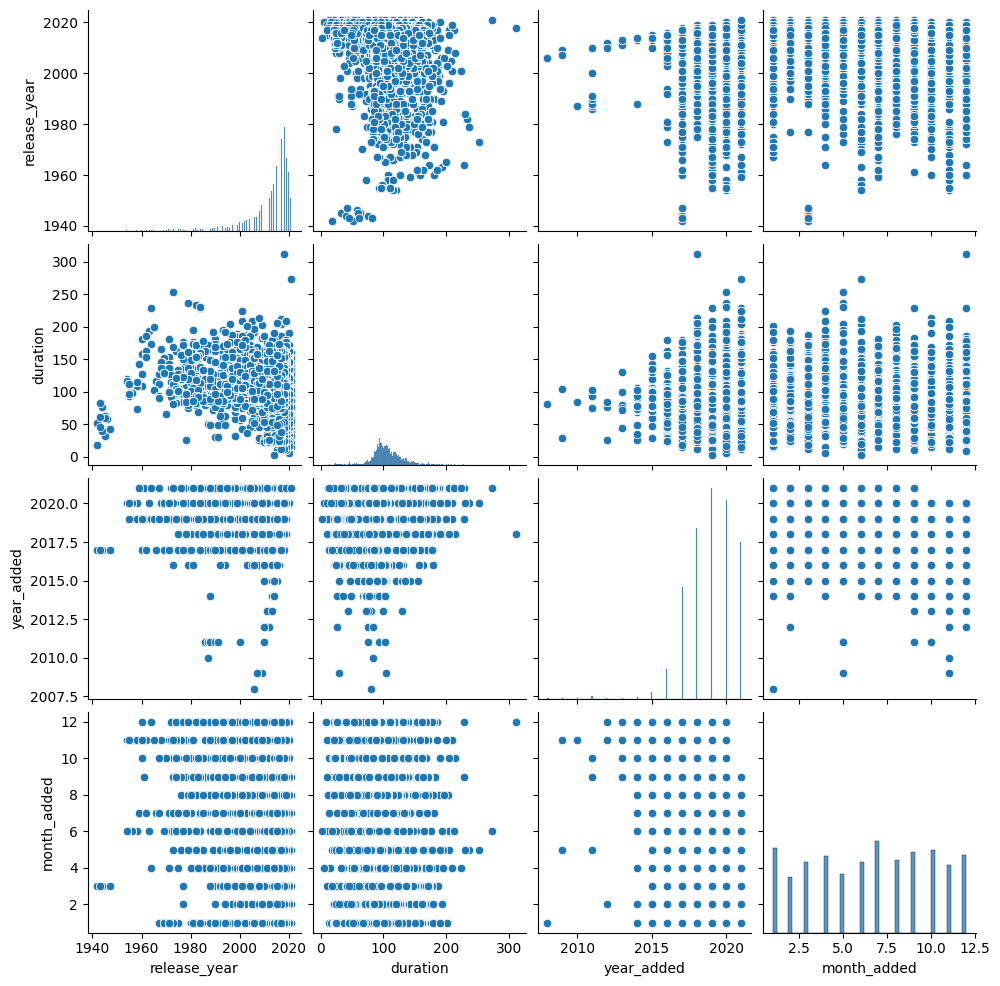

In [ ]:
sns.pairplot(data=movies)
plt.show()

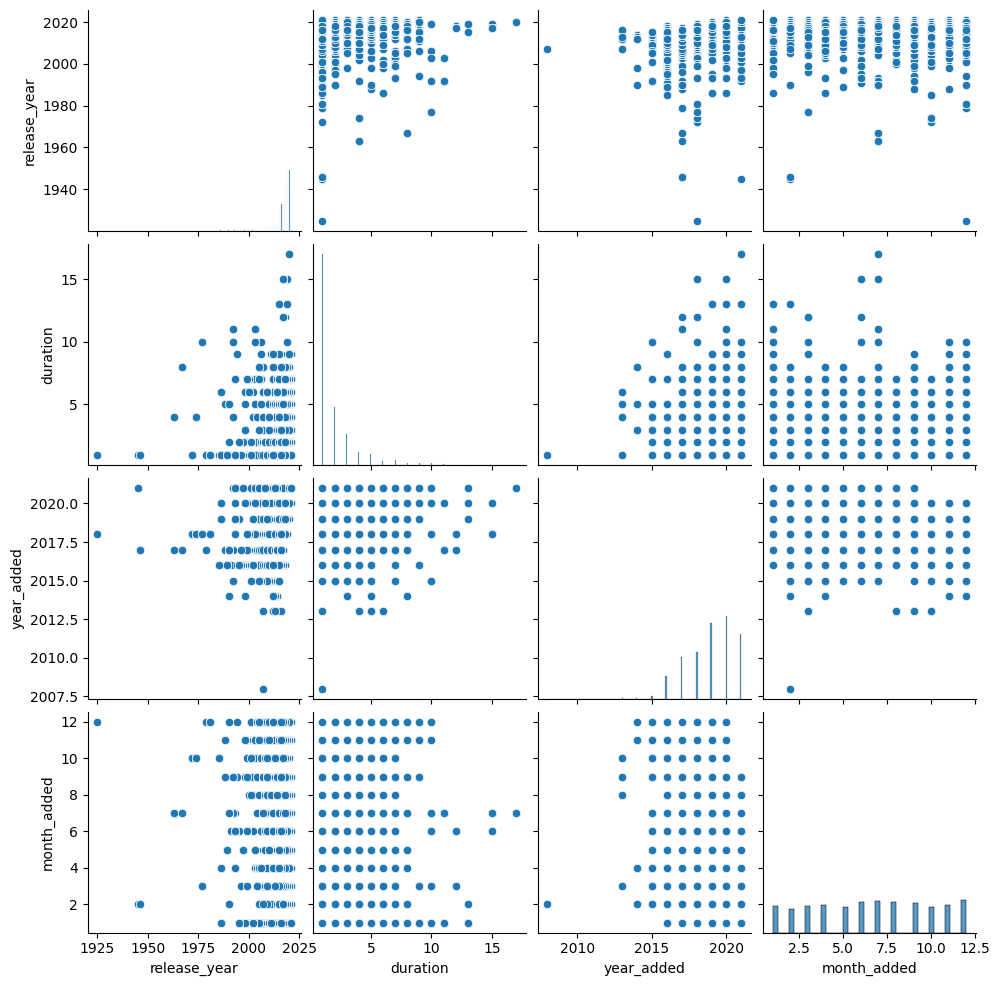

In [ ]:
sns.pairplot(data=tv)
plt.show()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_units
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Samuel West,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",min
1,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons
2,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",Seasons
3,s2,TV Show,Blood & Water,Danny Cannon,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Seasons
4,s2,TV Show,Blood & Water,Danny Cannon,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",Seasons


## **6. Insights based on Non-Graphical and Visual Analysis**

**6.1 Comments on the range of attributes**
1. Total % of movies-69.61%
2. Total % of TV shows-30.38%
3. Total Unique titles-8807
4. Total unique directors-5120
5. Total unique cast-39296
6. Total unique country-123
7. Total unique rating-14
8. Total unique genre-42
9. Min. duration of movies-3 min
10. Min duration of tv show-1 season
11. Max duration of movies-312 min
12. Max duration of tv show-17 seasons
13. Oldest movie release year-1942
14. Latest movie release year-2021
15. Oldest tv show release year-1925
16. First movie and tv show added year on netflix-2008
17. Latest tv show release year-2021



**6.2 Comments on the distribution of the variables and relationship
between them**
1. Approax 2/3 of content is available in form of movies and other 1/3
content is available in form of Tv shows on Netflix.
2. Country wise order for different type of content available:
  United State> Canada = United Kingdom > Australia > France

  Movies producing country (High to low) :
  United States > India > United Kingdom > Canada
3. TV Shows producing country (High to low) : United States>South
Korea>United Kingdom>Japan>Canada
4. In United States,
total movies produced=3195 (maximum among all)
total movie director=2594
total movie cast=14526
total movie genre=20
total movie rating=14
5. In United States,
total tv show produced=1264 (maximum among all)
total tv director=131
total tv cast=7101
total tv genre=22
total tv rating=7
6. Movies produced in United states increases till 2017 (397 movies) and
decreases afterward
7. TV Shows produced in United States starts from 2002 and increasing
trend observed. Currently, no of tv shows produced by US has outnumbered
the no of movies produced by US
8. Director with most number of movies produced- Rajiv Chilaka>Peter
Spirer>David Dhawan
9. Director with most number of TV shows produced- Danny
Cannon>Abhishek Chaubey>Kenny Ortega
10. In United states, genre of movies produced :
Dramas>Comedies>Documentaries
11. In United States, genre of TV Shows produced: TV Comedies>TV
Dramas>Kids TV
12. Genre of movies available on Netflix: International
Movies>Dramas>Comedies
13. Genre of TV show available on Netflix: International TV shows>TV
Dramas>TV comedies
14. International movies producing countries: India>France>United Kingdom
15. International TV shows producing countries: South Korea>Japan>United
Kingdom
16. Most number of movies by cast: Samuel West>Anupam Kher>Rupa
Bhimani
17. Most number of TV Shows by cast: David Attenborough>Lena
Waithe>Deborah Ann Woll
18. Genre of movies, in Samuel West worked as Cast:
Documentaries>International Movies>Sports movies
19. Genre of TV shows in which David Attenborough worked as Cast:
Docuseries>British TV shows>Science & Nature TV
20. Addition of movies in Netflix started from 2008, and increasing trend
observed till 2019. 21. Most number of movies added year=2019 (1424 movies)
22. Addition of TV shows in Netflix started from 2008, and increasing trend
observed afterwards
23. Most number of tv show added year=2020 (605 tv shows)
24. Movies added in Netflix month wise: July>April>Dec
25. TV shows added in Netflix month-wise: Dec>July>Sep
26. Movies rating order: TV-MA>TV-14>R
27. TV Shows rating order: TV-MA>TV-14>TV-PG



**6.3 Comments for each univariate and bivariate plot**
1. Increasing trend observed for movies release year till 2019 and decreases
afterwards.
2.Increasing trend observed for TV shows release with year
3. Rating for maximum movies-TV-MA
4. Rating for maximum TV shows-TV-MA
5. Trend for movies genre wise (No. of movies) :
International Movies > Dramas > Comedies > Documentaries > Action and
Adventure
6. Trend for TV show genre wise (No. of TV Shows) :
Internation TV shows > TV Dramas > TV Comedies > Crime TV Shows>
Kids TV
7. Top 5 movies producing country:
United States > India > United Kingdom > Canada > France
8. Top 5 tv shows producing country:
United States> South korea> United Kingdom >Japan> Canada
9. Bottom 5 Movies producing country:
Afghanistan > Liechtenstein > Sudan > Sri Lanka> Somalia
10. Bottom 5 TV shows producing country:
Austria> Uruguay > United Arab Emirates>Belarus> Syria
11. Top 5 movies producing director
Rajiv Chilaka> Peter Spirer > David Dhawan > Ryan Polito > Asit Mohapatra
12. Top 5 tv show producing director:
Danny Cannon > Abhishek Chaubey > Kenny Ortega > Noam Murro > Shin
Won ho
13. Top 5 movie cast (No. of movies) :
Samuel West > Anupam Kher > Rupa Bhimani > Burt Young > Benjamin
Kyalo
14. Top 5 TV show cast (No. of movies) :
David Attenborough > Lena Waithe > Deborah Ann woll > Takahiro
Sakurai > Samuel West
15. Movies Added to Netflix month-wise (Top 5) : July> April > Dec > Jan >
Oct
Bottom : Feb
16. TV show added to netflix month-wise ( Top5 ) : Dec> Jul > Sep > June >
Aug
Bottom : Feb
17. Movies duration trend:
Majority of movies are of 90 to 120 minutes
18.TV show duration trend: Majority of tv seasons have 1 or 2 seasons.
19. For movies:
25% of movies release year: 2013
50% of movies release year: 2016
75% of movies release year: 2018
Movies below and above 1.5 times of Inter Quartile range will be considered
as outliers.
Inter Quartile range=75% of movies release year- 25% of movies release
year
So outliers will be below 2004 (approax)
20. For TV Show:
  25% of tv shows release year: 2016
  50% of tv shows release year: 2018
  75% of tv shows release year: 2020
TV shows below and above 1.5 times of Inter Quartile range will be
considered as outliers.
Inter Quartile range=75% of tv shows release year- 25% of tv shows release
year
So outliers will be below 2010 (approax)
21. Movies duration:
25% of movies duration time: 85 min
50% of movies duration time: 98 min
75% of movies duration time: 115 min
Movies duration below and above 1.5 times of Inter Quartile range will be
considered as outliers.
Inter Quartile range=75% of movies duration- 25% of movies duration
So outliers will be below 45 min and above 155 min (approax)
22. TV shows duration:
25% of tv shows duration time: 1 season
75% of tv shows duration time: 2 season
TV shows duration below and above 1.5 times of Inter Quartile range will be
considered as outliers.
Inter Quartile range=75% of TV shows duration- 25% of TV shows duration
So outliers will be below 1 season and above 3 season (approax)
23. Content release year and duration of content are weekly negative co-related
24.Medium positive co-relation between release year of tv shows and Added
year of tv shows. It shows that tv shows production has started increasing in
recent years, with the advent of OTT platforms. Thus they are increasingly
added as years passed by.

## **7. Business Insights**

**Content Distribution and Trends:**

About 70% of the content on Netflix is movies, while 30% is TV shows. This
suggests that Netflix primarily focuses on providing a wide range of movies
to its users. There is a clear increasing trend in the release of TV shows and movies over the years. Also, there is a small decline in increasing trend of Movies from 2019. Although after 2019, not much data is available and thus it cant be concluded that netflix will focus more on TV shows in upcoming year. Although This trend indicates that Netflix is consistently expanding its library
to attract more viewers.

**Regional Focus:**

The United States is the major contributor to content on Netflix, with both the
highest number of movies and TV shows produced. This suggests that
Netflix has a strong focus on content produced in the US.
India and South Korea are notable contributors to the content library,
indicating Netflix's efforts to cater to a diverse global audience.

**Genre and Viewer Preferences:**

Dramas, comedies, and documentaries are the top genres for both movies
and TV shows produced in the United States. This suggests that these
genres are popular among viewers and may generate higher viewership.
International movies and TV shows are prominent genres available on
Netflix, indicating a commitment to offering diverse content from various
regions.

**Director and Cast Influence:**

Directors such as Rajiv Chilaka, Peter Spirer, and David Dhawan have
contributed significantly to the movie library. This highlights the importance
of collaborations with well-known directors to attract audiences. Notable cast members, such as Samuel West and Anupam Kher, are
associated with multiple movies. This suggests that familiar cast members
can help draw attention to content.

**Content Duration:**
Most movies on Netflix fall within the 90 to 120-minute range, indicating a
preference for content that can be consumed in a single sitting. For TV shows, the majority have 1 or 2 seasons, suggesting that viewers
may prefer shorter series that are easier to binge-watch.

**Release and Addition Patterns:**

The strong positive correlation between the release year of TV shows and
their addition year on Netflix indicates that the platform is actively acquiring
newer TV shows to meet user demand. This insight implies that Netflix's strategy involves acquiring and adding
recently produced TV shows to capitalize on their popularity and relevance.

**Viewer Ratings and Content Curation:**

TV-MA and TV-14 are the most common ratings for both movies and TV
shows, implying that Netflix targets a more mature audience. By focusing on higher-rated content, Netflix aims to attract viewers who
prefer content with more mature themes and content.

**Global Content Acquisition:**

The presence of content from various countries like India, France, South
Korea, and Japan indicates that Netflix is actively acquiring international
content to cater to its global user base. This strategy allows Netflix to offer a diverse range of content and attract
audiences from different cultural backgrounds.

**Outliers and Quality Control:**
The identification of outliers in release years, content durations, and addition
years allows Netflix to assess whether certain content may need closer
attention regarding its quality, relevance, or popularity.

**Business Strategy Implications:**

Netflix's strategy of actively adding newer TV shows aligns with the growing
trend of digital streaming and changing viewer habits. It's important for
Netflix to keep refreshing its content to remain competitive. The emphasis on collaborating with popular directors and recognizable cast
members can enhance the appeal of the content and attract a wider
audience. Diversifying the content library with international movies and TV shows
showcases Netflix's commitment to offering a global entertainment
experience. Viewer preferences for specific genres, ratings, and content duration can
guide Netflix's content acquisition and production decisions.

## **8. Recommendations:**


***Diversify Content Library:***

Recommendation: Continue to invest in a diverse range of international
movies and TV shows to cater to the global audience.

Why: This will attract viewers from different regions and cultures, increasing
engagement and subscriber base.


**Collaborate with Recognizable Cast and Directors:**

Recommendation:Strengthen partnerships with popular directors and well- known cast members.

Why: This enhances the appeal of content and draws attention from audiences who appreciate familiar faces and renowned creators.

**Focus on Trending Genres:**
Recommendation: Emphasize genres like dramas, comedies, and
documentaries for both movies and TV shows.

Why: These genres have a higher viewership potential, making them more
likely to engage audiences.

**Regularly Refresh Content:**

Recommendation: Maintain a strategy of frequently adding new TV shows to
the platform.

Why: Reflects changing viewer preferences, keeps content relevant, and
sustains subscriber interest.

**Cater to Shorter Attention Spans:**

Recommendation: Curate content with durations of around 90 to 120
minutes for movies and 1 to 2 seasons for TV shows.

Why: Matches the average viewer's consumption patterns and encourages
binge-watching.

**Quality Control for Outliers:**

Recommendation: Review and assess outlier content in terms of release
years and durations.

Why: Ensures that content maintains high quality and remains relevant to
users' preferences.

**Promote High-Rated Content:**

Recommendation: Highlight and promote content with TV-MA and TV-14
ratings.

Why: Appeals to viewers who seek mature and engaging content, leading to
increased engagement.

**Stay Current with Industry Trends:**

Recommendation: Stay up-to-date with industry trends and evolving viewer
habits.

Why: Helps Netflix stay ahead of the competition and adapt to changing
viewer preferences.

**Leverage Positive Correlations:**

Recommendation: Capitalize on the correlation between release and
addition years of TV shows.

Why: Acquiring and adding recently released TV shows can attract viewers
looking for up-to-date content.

**Strategically Plan Content Releases:**

Recommendation: Plan content releases to align with peak viewing months, such as July, April, and December.

Why: Maximizes viewership during periods when people are more likely to
watch.

**Customer Feedback Integration:**

Recommendation: Actively gather user feedback on content preferences and
dislikes.
Why: Provides insights for further refining content selection and curation.

**Explore Emerging Markets:**

Recommendation: Focus on expanding content offerings in emerging
markets.

Why: Opens up new audiences and potential growth opportunities.